In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import soundfile as sf
from pathlib import Path

In [2]:
fs = 44100
num_taps = 512 * 2 + 1

In [3]:
filter_bands = [
(0, 0.4536993333487237, 0, 1061.8895820580437, 'b', 'Branch I'),
(0.4536993333487237, 2.6878933202410695, 1061.8895820580437, 6291.0515944125455, 'g', 'Branch P'),
(2.6878933202410695, 3.5952919869385167, 6291.0515944125455, 8414.830758528633, 'r', 'Branch II'),
(3.5952919869385167, 5.829485973830862, 8414.830758528633, 13643.992770883133, 'g', 'Branch P'),
(5.829485973830862, 6.73688464052831, 13643.992770883133, 15767.771934999222, 'b', 'Branch I'),
(6.73688464052831, 8.971078627420656, 15767.771934999222, 20996.933947353722, 'g', 'Branch P'),
(8.971078627420656, 9.42100804958507, 20996.933947353722, 22050.0, 'r', 'Branch II'),
]

In [4]:
filter_firs = []

for band in filter_bands:
    low, high = band[2], band[3]
    if low == 0:
        fir = signal.firwin(num_taps, high, fs=fs, pass_zero=True) 
    elif high >= fs / 2:
        fir = signal.firwin(num_taps, low, fs=fs, pass_zero=False) 
    else:
        fir = signal.firwin(num_taps, [low, high], fs=fs, pass_zero=False) 
    
    filter_firs.append(fir)

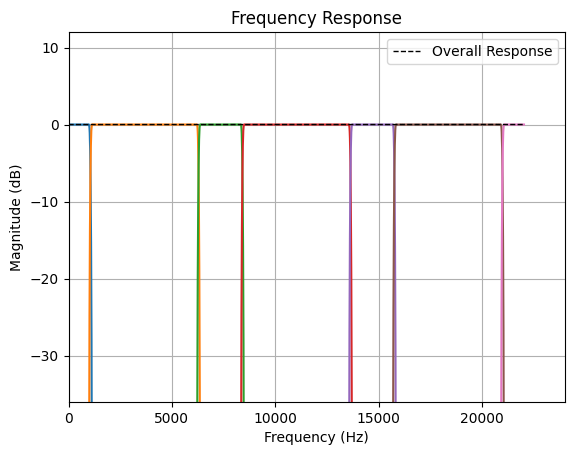

In [5]:
overall_response = None

for i, fir in enumerate(filter_firs):
    w, h = signal.freqz(fir, worN=2000, fs=fs)
    plt.plot(w, 20 * np.log10(abs(h)))
    if overall_response is None:
        overall_response = h
    else:
        overall_response += h

plt.plot(w, 20 * np.log10(np.abs(overall_response) + 1e-10), '--k', linewidth=1, label='Overall Response')
plt.title('Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.ylim(-36, 12)
plt.xlim(0, 24000)
plt.legend()
plt.grid()
plt.show()

In [6]:
P = filter_firs[1] + filter_firs[3] + filter_firs[5] + filter_firs[7]
C = filter_firs[0] + filter_firs[2] + filter_firs[4] + filter_firs[6]

w, h = signal.freqz(P, worN=2000, fs=fs)
plt.plot(w, 20 * np.log10(abs(h)))
w, h = signal.freqz(C, worN=2000, fs=fs)
plt.plot(w, 20 * np.log10(abs(h)))
plt.ylim(-48, 6)
plt.xlim(0, 24000)
plt.show()

IndexError: list index out of range